In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

In [9]:
img = cv2.imread('img1.png')
height, width, channel = img.shape
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #bgr을 gray로 color convert

In [10]:
ret, thresh = cv2.threshold(imgray, 80, 255, 0)

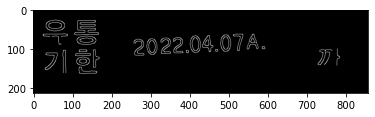

In [11]:
blur = cv2.GaussianBlur(imgray,(3,3),0) #노이즈 줄이기 위해 가우시안블러 사용
cv2.imwrite('img1.png',blur)
canny = cv2.Canny(blur,100,200)
cv2.imwrite('canny.jpg',canny)
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
contours, _ = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
contour_res = np.zeros((height, width, channel), dtype=np.uint8)
image = cv2.drawContours(contour_res, contours, -1, (0,255,0), 3)

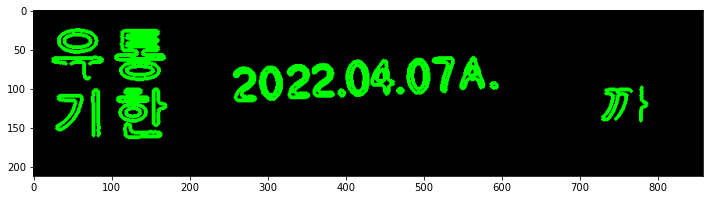

In [14]:
plt.figure(figsize=(12,10))
plt.imshow(image)

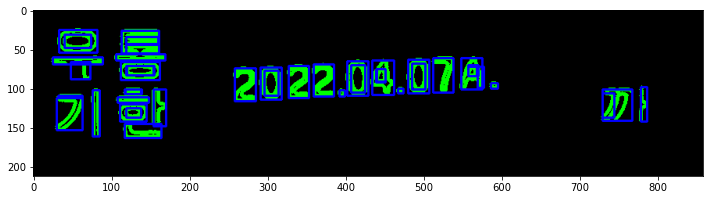

In [15]:
contour_dict = [] #찾기 쉽게 범위 데이터 저장

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour) #글자 범위 잡아내기
    rectangle = cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255),2)
    contour_dict.append({
        'contour':contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w/2),
        'cy': y + (h/2)})

plt.figure(figsize=(12,10))
plt.imshow(rectangle)

In [16]:
MIN_AREA = 80 #숫자의 boundingrect의 최소 범위
MIN_WIDTH, MIN_HEIGHT = 2,10 #최소 너비와 높이
MINRATIO, MAX_RATIO = 0.25, 1.0 #가로대비 세로 비율

possible_contour = []

cnt = 0
for d in contour_dict:
    area = d['w']*d['h']
    ratio = d['w']/d['h']
    
    if area > MIN_AREA and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT and MINRATIO<ratio<MAX_RATIO:
        d['idx'] = cnt #인덱스 저장
        cnt +=1
        possible_contour.append(d)

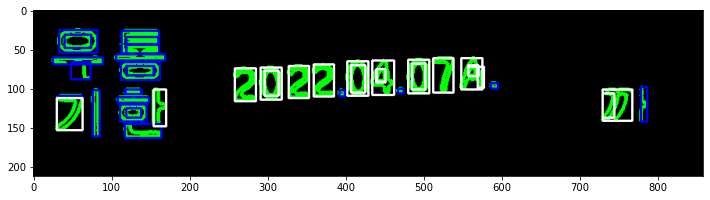

In [17]:
for d in possible_contour:
    cv2.rectangle(rectangle, (d['x'],d['y']), (d['x']+d['w'], d['y']+d['h']), (255,255,255), 2)
    
plt.figure(figsize=(12,10))
plt.imshow(rectangle, cmap='gray') 

In [18]:
print(possible_contour)

[{'contour': array([[[ 33, 112]],

       [[ 32, 113]],

       [[ 33, 114]],

       [[ 36, 114]],

       [[ 37, 115]],

       [[ 38, 114]],

       [[ 39, 114]],

       [[ 40, 115]],

       [[ 52, 115]],

       [[ 53, 116]],

       [[ 53, 117]],

       [[ 54, 118]],

       [[ 54, 119]],

       [[ 53, 120]],

       [[ 53, 122]],

       [[ 52, 123]],

       [[ 52, 125]],

       [[ 51, 126]],

       [[ 51, 127]],

       [[ 50, 128]],

       [[ 50, 129]],

       [[ 49, 130]],

       [[ 49, 131]],

       [[ 47, 133]],

       [[ 47, 134]],

       [[ 37, 144]],

       [[ 36, 144]],

       [[ 34, 146]],

       [[ 33, 146]],

       [[ 32, 147]],

       [[ 31, 147]],

       [[ 30, 148]],

       [[ 31, 149]],

       [[ 31, 150]],

       [[ 30, 151]],

       [[ 31, 151]],

       [[ 32, 152]],

       [[ 37, 152]],

       [[ 39, 150]],

       [[ 40, 150]],

       [[ 42, 148]],

       [[ 43, 148]],

       [[ 52, 139]],

       [[ 52, 138]],

       [[ 54, 136]]

In [21]:
print(matched_result)

[array([{'contour': array([[[ 33, 112]],

              [[ 32, 113]],

              [[ 33, 114]],

              [[ 36, 114]],

              [[ 37, 115]],

              [[ 38, 114]],

              [[ 39, 114]],

              [[ 40, 115]],

              [[ 52, 115]],

              [[ 53, 116]],

              [[ 53, 117]],

              [[ 54, 118]],

              [[ 54, 119]],

              [[ 53, 120]],

              [[ 53, 122]],

              [[ 52, 123]],

              [[ 52, 125]],

              [[ 51, 126]],

              [[ 51, 127]],

              [[ 50, 128]],

              [[ 50, 129]],

              [[ 49, 130]],

              [[ 49, 131]],

              [[ 47, 133]],

              [[ 47, 134]],

              [[ 37, 144]],

              [[ 36, 144]],

              [[ 34, 146]],

              [[ 33, 146]],

              [[ 32, 147]],

              [[ 31, 147]],

              [[ 30, 148]],

              [[ 31, 149]],

              [[ 31, 150]],

 